# Decison Tree

A Decision Tree is a model that resembles a tree structure. It begins with one question node as the tip of a tree then splits into different branches that lead to lower nodes questions until it reaches the lowest branches known as a leaf. This whole process is similar to the logical process of deciding yes or no, therefore, this method can help in making decisions and that is where its name came from. 

However, the defect of Decision Tree can not be easily ignored. They can oversimplify complex problems and are prone to overfitting a model. 

Decision Tree is still a powerful and rather simplified tool to provide an insights of the data therefore help in decision making process.

# Tools and Libraries:

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.svm import SVC



# EDA Process

In [46]:
results = pd.read_csv('Data/results.csv')
mergedPitStops = pd.read_csv('Data/mergedPitStops.csv')

In [47]:
data = pd.merge(mergedPitStops,results[['driverId', 'position']], left_on = 'driverId', right_index = True, how = 'left')

/var/folders/j9/cbm31jzn08z95c3hz67rzjyc0000gn/T/ipykernel_60702/367688774.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'driverId_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(mergedPitStops,results[['driverId', 'position']], left_on = 'driverId', right_index = True, how = 'left')


In [48]:
column_to_move = data.pop('position')
data.insert(2, 'position', column_to_move)
data = data.replace('\\N', pd.NA)
data = data.dropna()

In [50]:
selected_columns = ['driverId_x', 'stop', 'position', 'seconds', 'circuitId_x', 'constructorId_x']
selected_df = data[selected_columns]
selected_df['circuitId_x'] = pd.to_numeric(selected_df['circuitId_x'], errors='coerce')
selected_df.head()

/var/folders/j9/cbm31jzn08z95c3hz67rzjyc0000gn/T/ipykernel_60702/2425359013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['circuitId_x'] = pd.to_numeric(selected_df['circuitId_x'], errors='coerce')


,driverId_x,driverId_x,stop,position,seconds,circuitId_x,constructorId_x
0,153,153,1,6,26.898,17.0,5
1,153,153,2,6,24.463,17.0,5
2,153,153,3,6,26.348,17.0,5
6,4,4,1,5,23.251,17.0,6
7,4,4,2,5,24.733,17.0,6


# Methods

In [8]:
X = selected_df.drop('position', axis = 1)  # features
y = selected_df['position'] 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 82)

print("TRAINING SHAPES:",x_train.shape, y_train.shape)
print("TEST SHAPES:",x_test.shape, y_test.shape)

TRAINING SHAPES: (3784, 6) (3784,)
TEST SHAPES: (947, 6) (947,)


### Training the model
Train a sklearn decision tree model on x_train, y_train

In [24]:
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

Use the model to make predictions for the training and test set

In [25]:
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [43]:
def confusion_plot(y_true, y_pred, class_labels):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    
    # Print the confusion matrix plot
    disp.plot()
    plt.show()

------TRAINING------


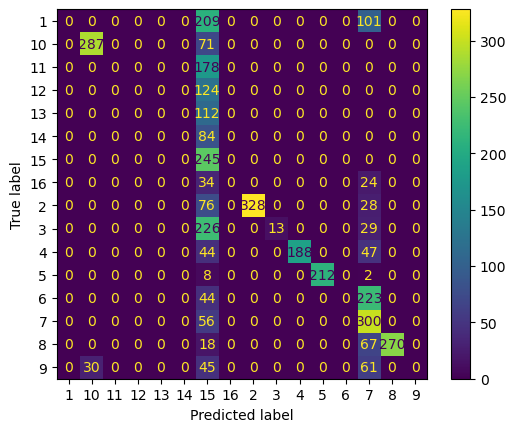

------TEST------


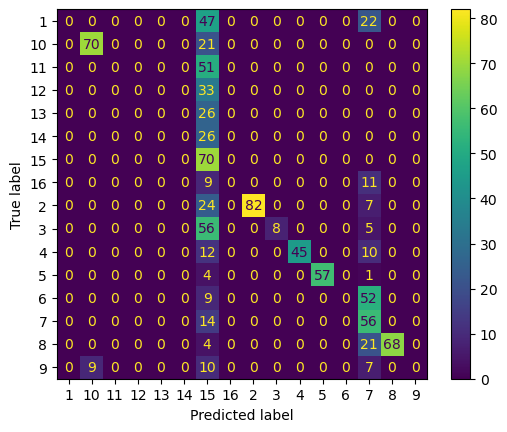

In [44]:
# Generate predictions using the decision tree model with a depth of 4 for both train and test sets
dt_classifier_depth_4 = DecisionTreeClassifier(max_depth = 4, random_state = 82)
dt_classifier_depth_4.fit(x_train, y_train)
yp_train = dt_classifier_depth_4.predict(x_train)
yp_test = dt_classifier_depth_4.predict(x_test)

# Get the unique class labels
class_labels = dt_classifier_depth_4.classes_

# Plot the confusion matrix for the training set
print("------TRAINING------")
confusion_plot(y_train, yp_train, class_labels)

# Plot the confusion matrix for the test set
print("------TEST------")
confusion_plot(y_test, yp_test, class_labels)

### Visualize the tree

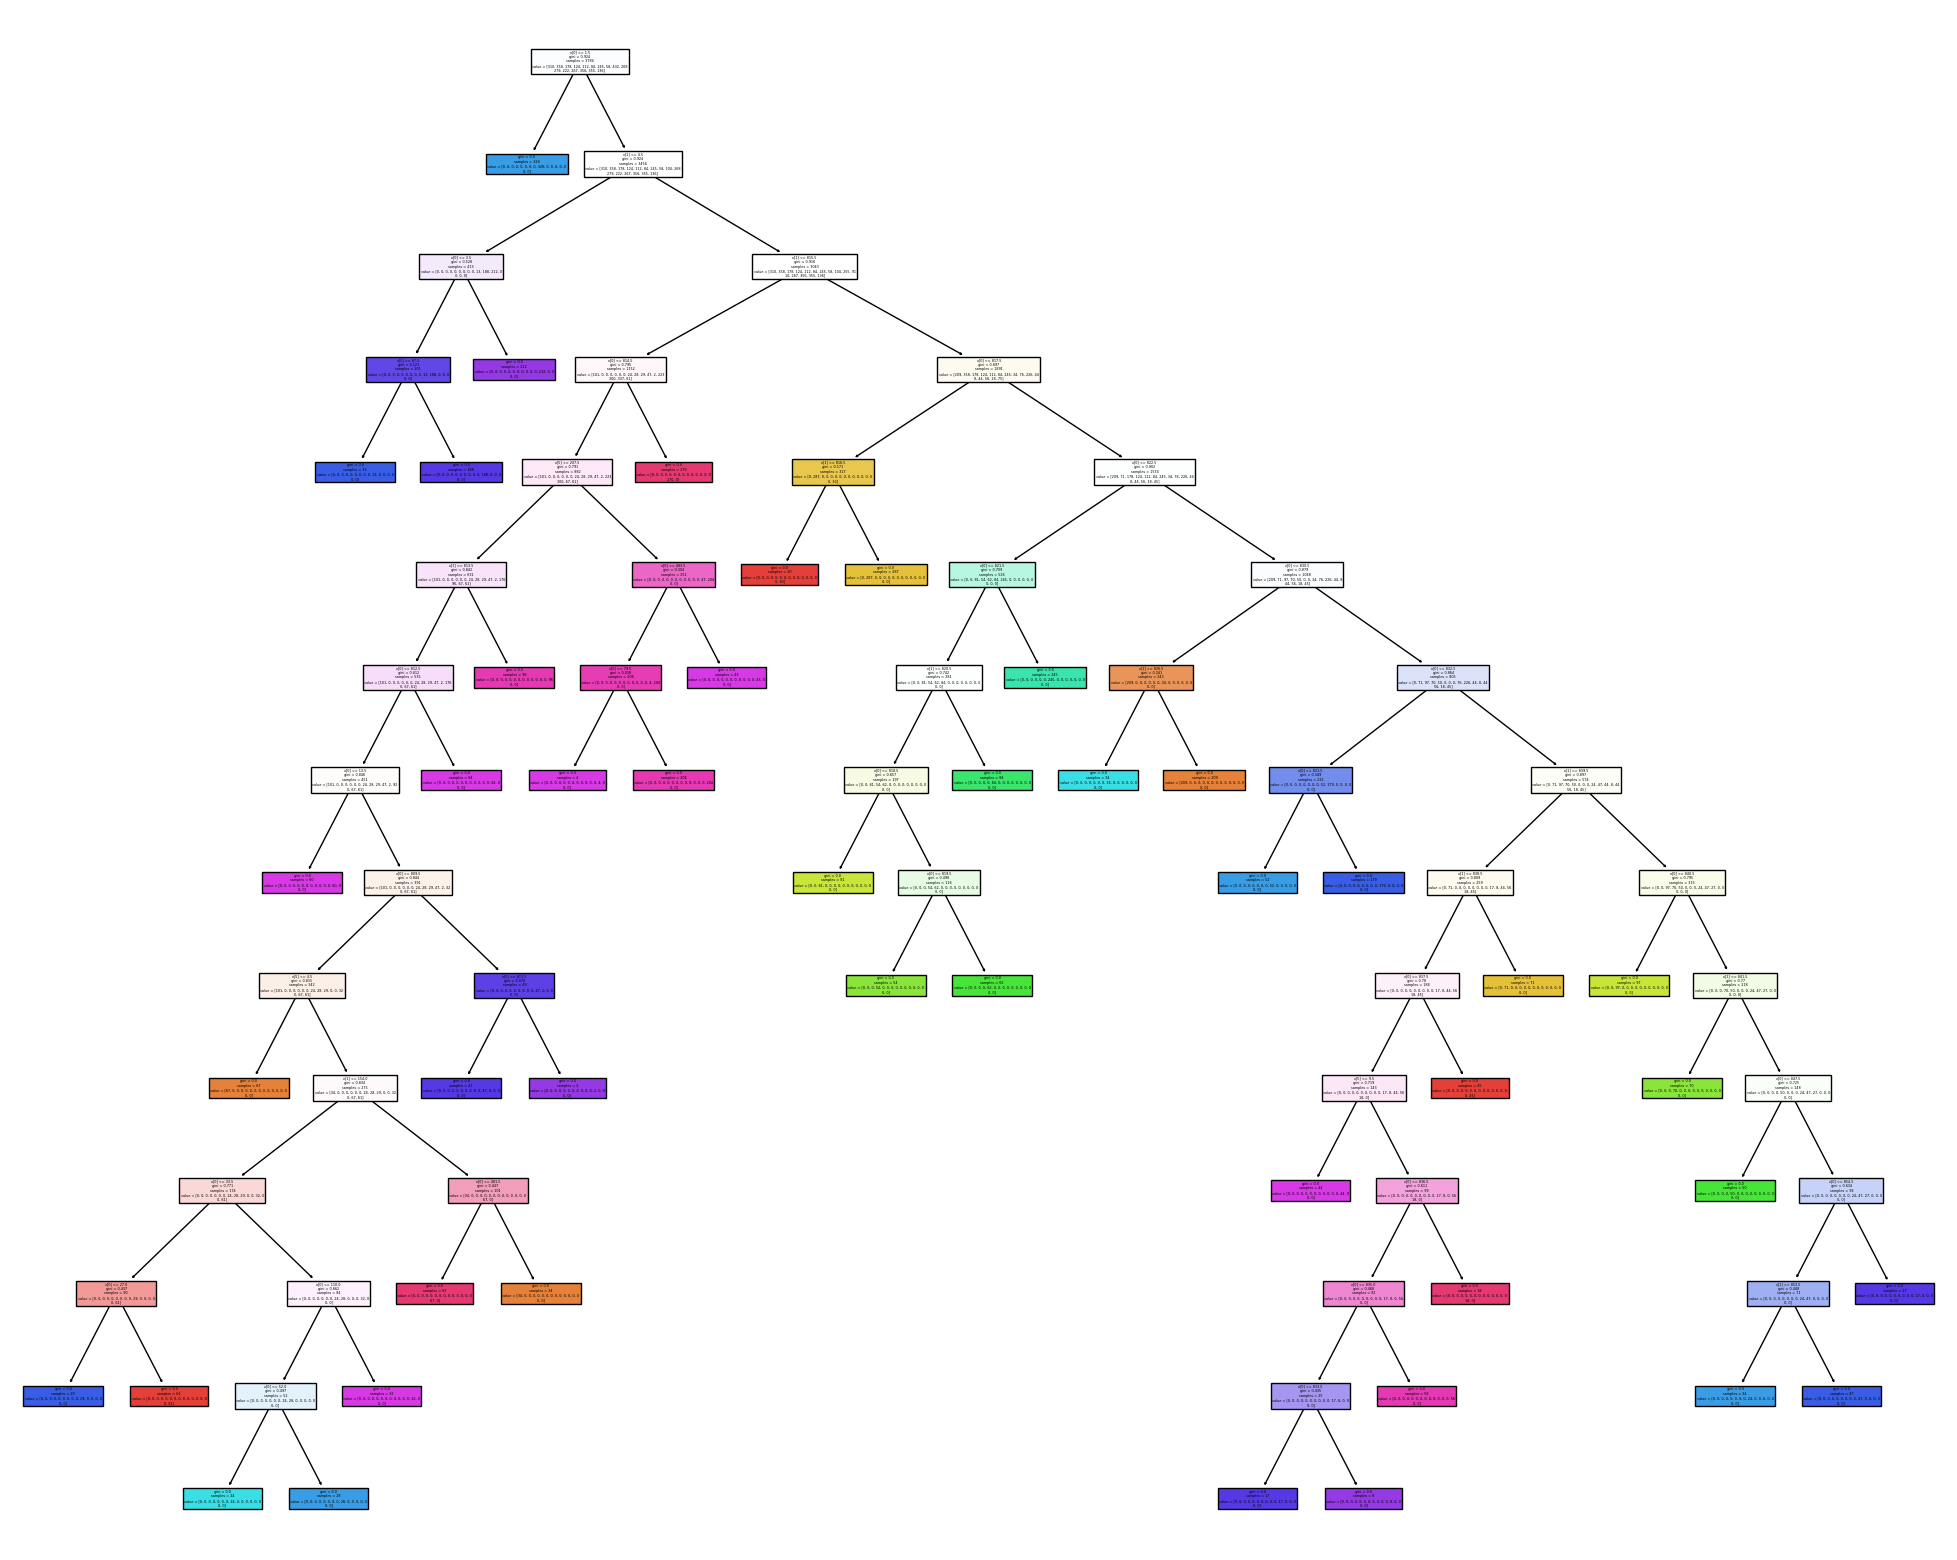

In [39]:
# INSERT CODE TO WRITE A FUNCTION "def plot_tree(model,X,Y)" VISUALIZE THE DECISION TREE (see https://mljar.com/blog/visualize-decision-tree/ for an example)
def plot_tree(model, x, y):
    fig = plt.figure(figsize = (25, 20))
    _ =tree.plot_tree(model, filled = True)
    plt.show()

plot_tree(model, X, y)

### Hyper-parameter Tuning
Then use the following code to loop over possible hyper-parameters values


In [52]:
test_results = []
train_results = []

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth = num_layer)
    model = model.fit(x_train, y_train)

    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer ,accuracy_score(y_test, yp_test), recall_score(y_test, yp_test, average='macro'), recall_score(y_test, yp_test, average='weighted')])
    train_results.append([num_layer, accuracy_score(y_train, yp_train), recall_score(y_train, yp_train, average='macro'), recall_score(y_train, yp_train, average='weighted')])


Then generate the three plots below 

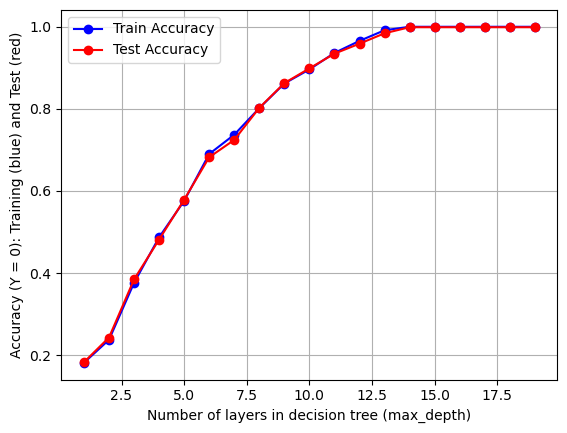

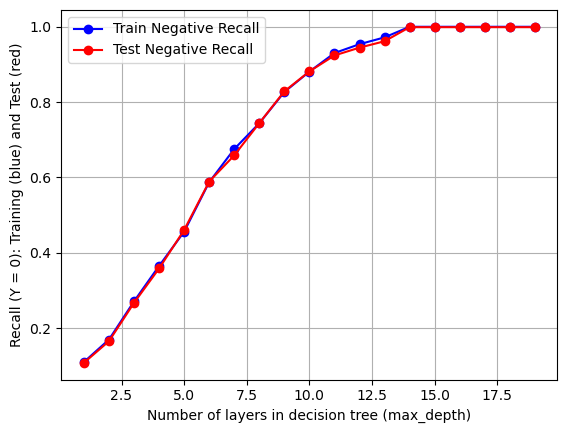

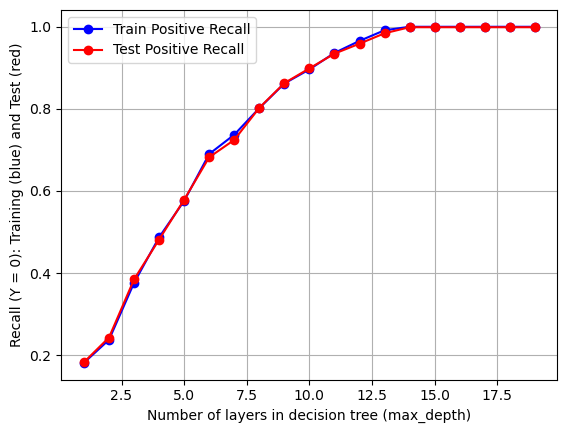

In [53]:
train_df = pd.DataFrame(train_results, columns = ['max_depth', 'accuracy', 'recall_negative', 'recall_positive'])
test_df = pd.DataFrame(test_results, columns = ['max_depth', 'accuracy', 'recall_negative', 'recall_positive'])

plt.plot(train_df['max_depth'], train_df['accuracy'], 'o-', color = 'blue', label = 'Train Accuracy')
plt.plot(test_df['max_depth'], test_df['accuracy'], 'o-', color = 'red', label = 'Test Accuracy')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Accuracy (Y = 0): Training (blue) and Test (red)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_df['max_depth'], train_df['recall_negative'], 'o-', color = 'blue', label = 'Train Negative Recall')
plt.plot(test_df['max_depth'], test_df['recall_negative'], 'o-', color = 'red', label = 'Test Negative Recall')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Recall (Y = 0): Training (blue) and Test (red)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_df['max_depth'], train_df['recall_positive'], 'o-', color = 'blue', label = 'Train Positive Recall')
plt.plot(test_df['max_depth'], test_df['recall_positive'], 'o-', color = 'red', label = 'Test Positive Recall')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Recall (Y = 0): Training (blue) and Test (red)')
plt.legend()
plt.grid(True)
plt.show()

### Train optimal model 
Re-train the decision tree using the optimal hyper-parameter obtained from the plot above


In [56]:
model = tree.DecisionTreeClassifier(max_depth = 4)
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

------TRAINING------


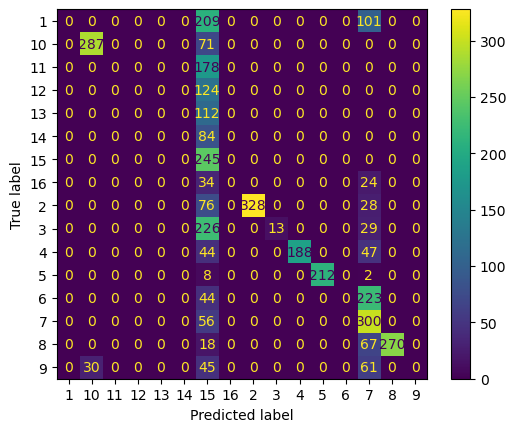

------TEST------


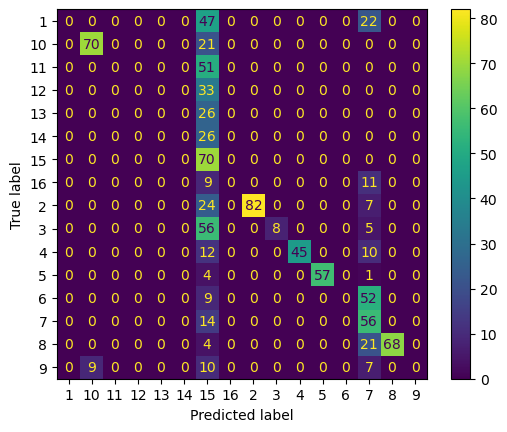

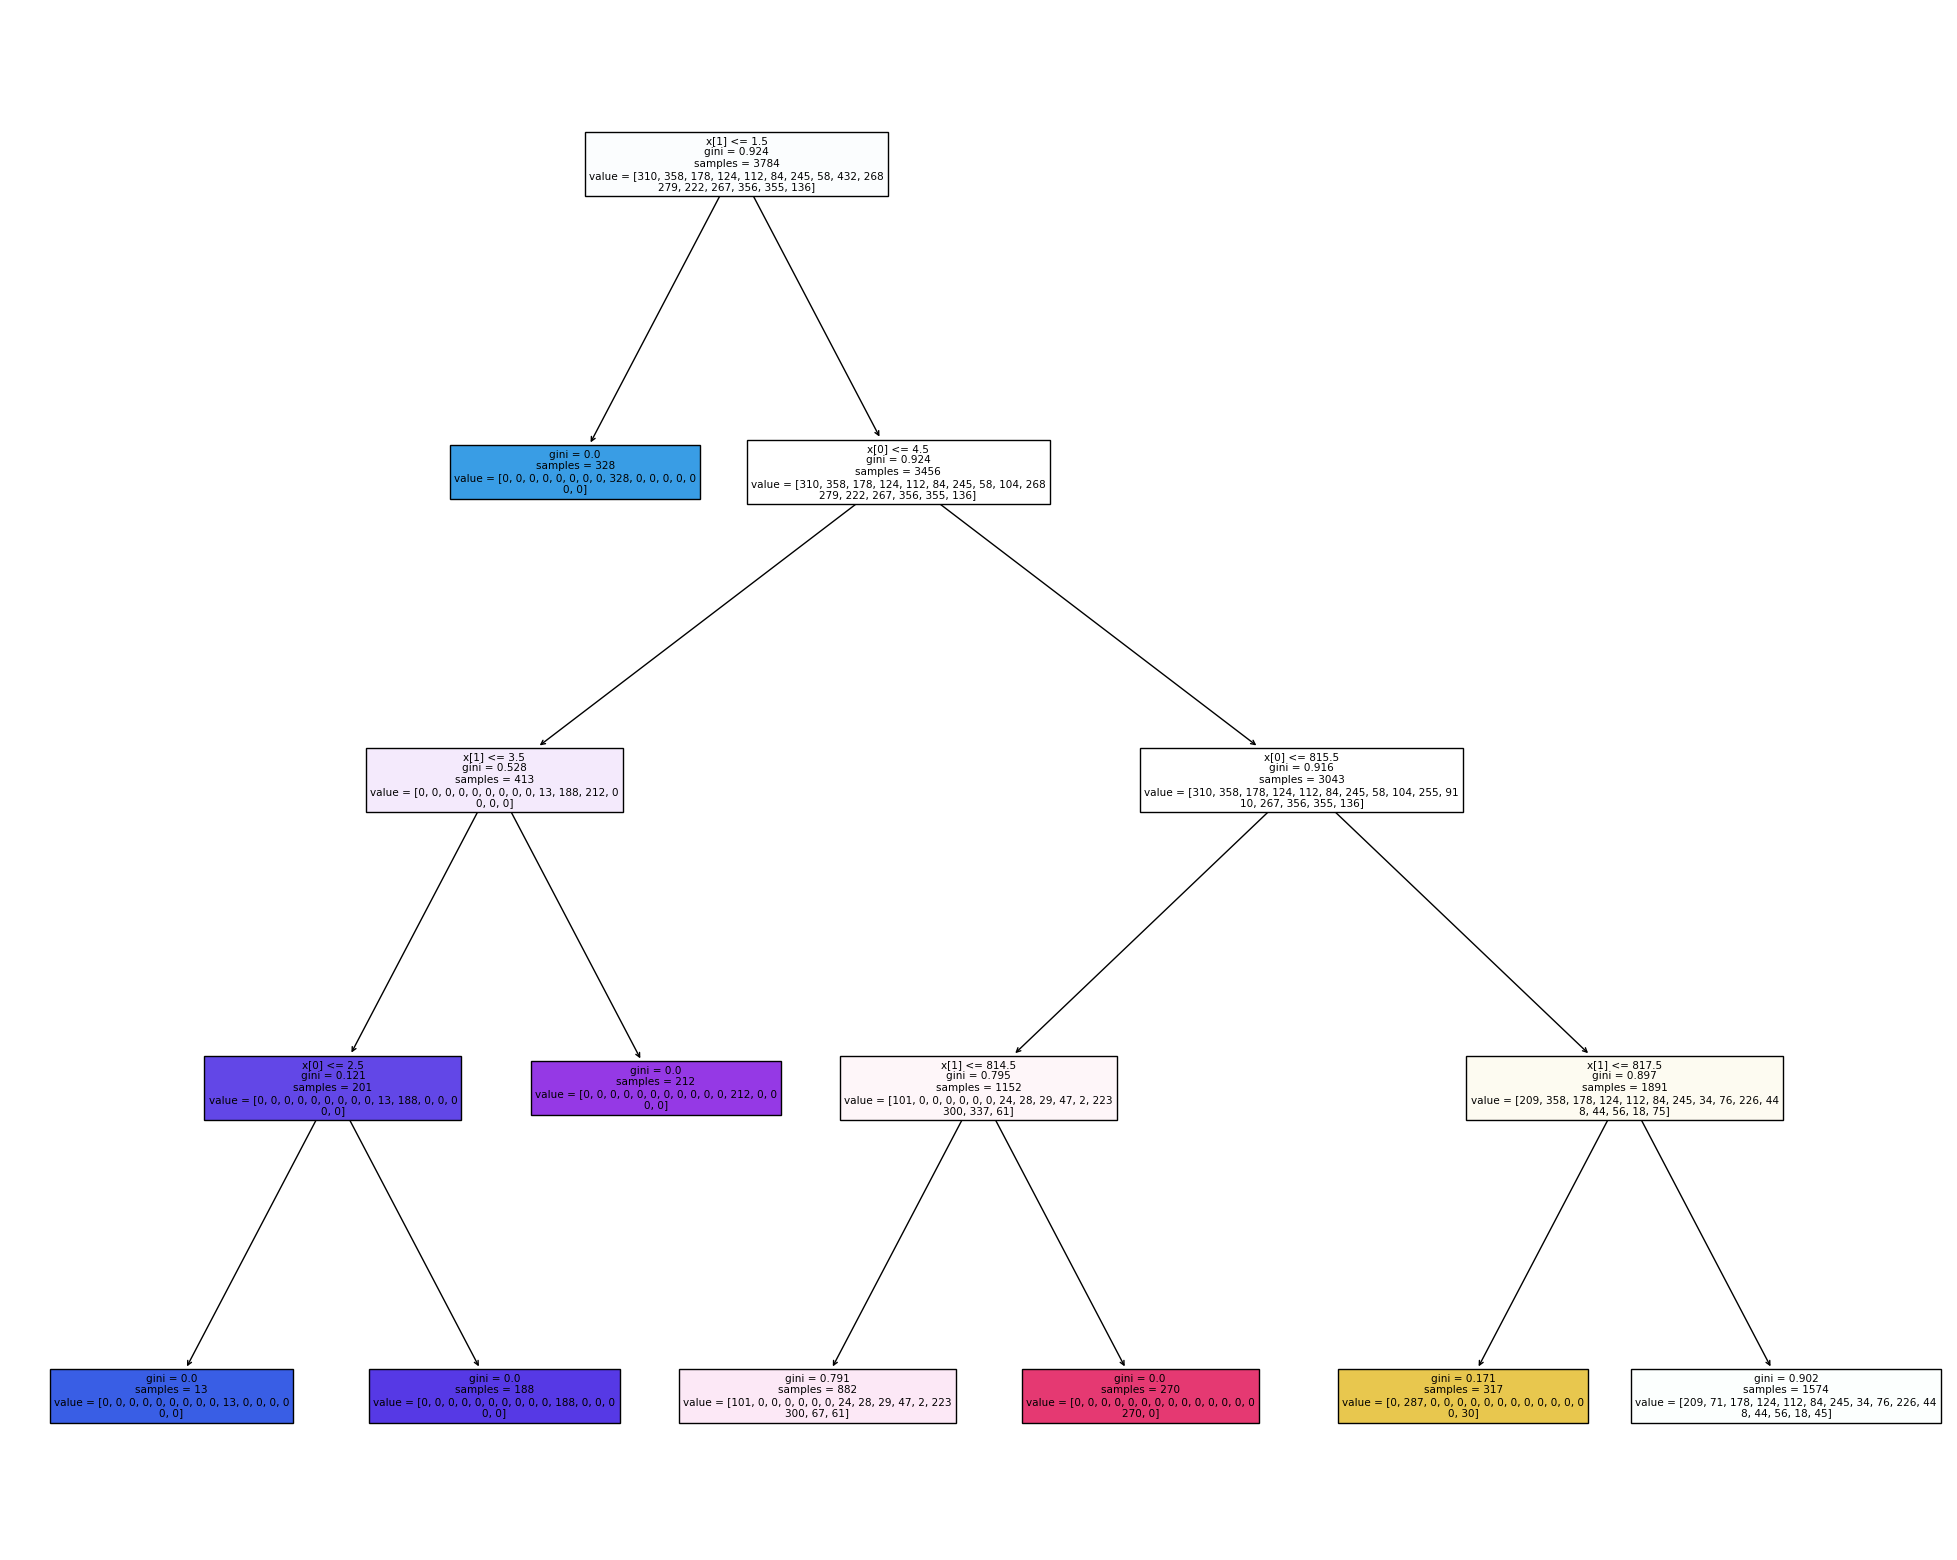

In [59]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
class_labels = model.classes_

print("------TRAINING------")
confusion_plot(y_train, yp_train, class_labels)
print("------TEST------")
confusion_plot(y_test, yp_test, class_labels)

plot_tree(model, X, y)

# Summary
Based on the training sets' confusion matrixs and plots, there is a higher chance that this model is overfitting since the accuracy of the training is kind of higher than expected. 

